In [2]:
# Import the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the code output clean

# Define initial parameters
Ntrain = 1000  # Number of training data points
Ntest = 100    # Number of test data points
xmin = -10     # Lower bound of x values
xmax = 10      # Upper bound of x values
Noise = 0.05   # Noise level applied to the data

# Print a message to indicate data generation
print("\033[92mGenerating the parabola data set\033[0m")

# Initialize empty lists to hold training and test data
X_train = []
Y_train = []
X_test = []
Y_test = []

#--------------------------------------------------------------------
def sim_parabola(xmin, xmax, Noise):
    """
    Function to generate a random data point following the parabola y = x^2
    with added noise.
    """
    x = np.random.random() * (xmax - xmin) + xmin  # Generate random x value
    y = x * x * (1 + np.random.random() * Noise)  # Calculate y = x^2 with noise
    return x, y
#--------------------------------------------------------------------

# Generate training data
for i in range(Ntrain):
    x, y = sim_parabola(xmin, xmax, Noise)  # Generate a random point
    X_train.append(x)  # Append x value to training data
    Y_train.append(y)  # Append y value to training data

# Generate test data
for i in range(Ntest):
    x, y = sim_parabola(xmin, xmax, Noise)  # Generate a random point
    X_test.append(x)  # Append x value to test data
    Y_test.append(y)  # Append y value to test data

# Convert lists to numpy arrays
x_test = np.array(X_test)
y_test = np.array(Y_test)
x_train = np.array(X_train)
y_train = np.array(Y_train)

# Print data set information
print("Have generated the following data:")
print("\tN(test)  = ", len(x_test))
print("\tN(train) = ", len(x_train))

Generating the parabola data set
Have generated the following data:
	N(test)  =  100
	N(train) =  1000


In [3]:
#--------------------------------------------------------------------
# Build the MLP model
#--------------------------------------------------------------------
# Define training configuration
ValidationSplit = 0.5  # Fraction of data used for validation
BatchSize = 100        # Number of samples per training batch
Nepochs = 100          # Number of training epochs
DropoutValue = 0.2     # Fraction of nodes dropped during training

# Define the model structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(1,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),  # First hidden layer
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),                  # Second hidden layer
    tf.keras.layers.Dropout(DropoutValue),                                                       # Dropout layer
    tf.keras.layers.Dense(1)                                                                    # Output layer
])

# Print model configuration details
print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("2 layer MLP with configuration 1:128:128:1")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# Specify the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()  # Mean squared error for regression
learning_rate = 0.001  # Learning rate for the optimizer

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)

# Train the model
history = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)

--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


2 layer MLP with configuration 1:128:128:1
Dropout values       =  0.2
Leaky relu parameter =  0.1
ValidationSplit      =  0.5
BatchSize            =  100
Nepochs              =  100
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2031.0983 - val_loss: 2008.5046
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1883.9402 - val_loss: 1874.4615
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1743.1255 - val_loss: 1738.8945
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1748.4161 - val_loss: 1594.4253
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1686.6859 - val_loss: 1440.6400
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1369.4695 - val

Display the evolution of the loss as a function of the training epoch

  N(Epochs)        =  100


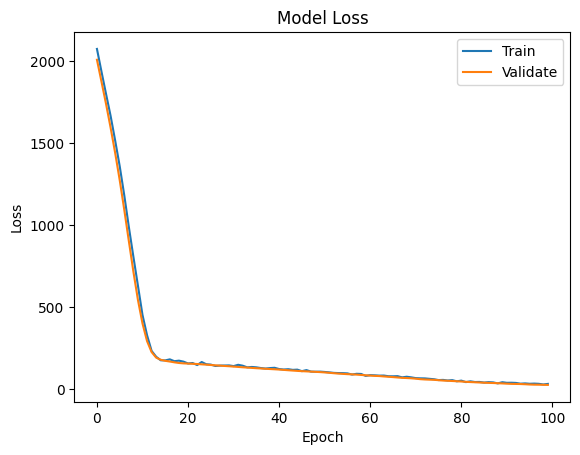

4/4 - 0s - 40ms/step - loss: 25.0882
loss = 25.088

Display the model prediction against the ground truth from test data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


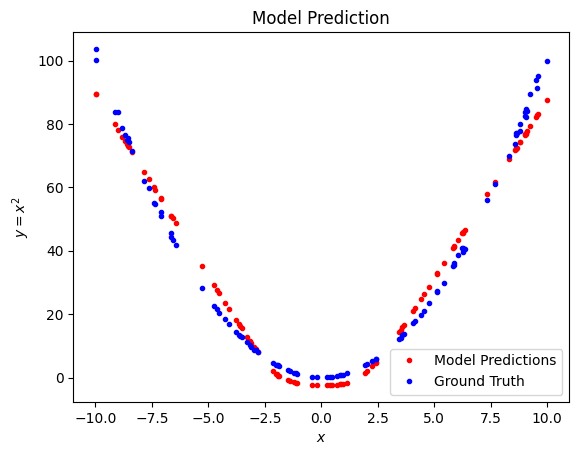


Display the difference between the model prediction and the ground truth from test data



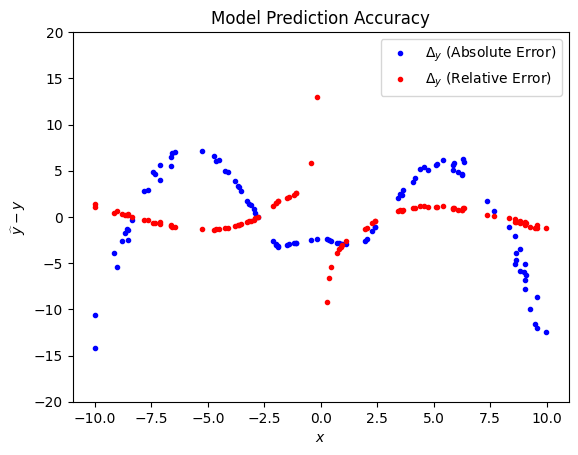

In [4]:
#--------------------------------------------------------------------
# Visualize the training process
#--------------------------------------------------------------------
print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", Nepochs)

# Plot the loss during training and validation
plt.plot(history.history['loss'], label='loss')  # Training loss
plt.plot(history.history['val_loss'], label='val_loss')  # Validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()
plt.clf()

#--------------------------------------------------------------------
# Evaluate the model on test data
#--------------------------------------------------------------------
loss = model.evaluate(x_test, y_test, verbose=2)  # Evaluate the model
print("loss = {:5.3f}".format(loss))

#--------------------------------------------------------------------
# Plot predictions vs. ground truth
#--------------------------------------------------------------------
print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

# Make predictions on test data
y_predict = model.predict(x_test)

# Plot the predictions and ground truth
plt.plot(x_test, y_predict, "r.", label="Model Predictions")  # Predicted values
plt.plot(x_test, y_test, "b.", label="Ground Truth")  # Actual values
plt.title('Model Prediction')
plt.ylabel('$y=x^{2}$')
plt.xlabel('$x$')
plt.legend(loc='lower right')
plt.show()
plt.clf()

#--------------------------------------------------------------------
# Plot prediction error
#--------------------------------------------------------------------
print("\n\033[1mDisplay the difference between the model prediction and the ground truth from test data\033[0m\n")

delta = []  # Absolute error
deltapc = []  # Relative error

# Calculate errors
for i in range(len(y_predict)):
    thedelta = y_predict[i] - y_test[i]  # Absolute error
    delta.append(thedelta)
    if x_test[i]:
        deltapc.append(thedelta / x_test[i])  # Relative error
    else:
        deltapc.append(0.0)

# Plot the errors
plt.plot(x_test, delta, "b.", label="$\Delta_y$ (Absolute Error)")
plt.plot(x_test, deltapc, "r.", label="$\Delta_y$ (Relative Error)")
plt.legend(loc='upper right')
plt.title('Model Prediction Accuracy')
plt.ylabel('$\widehat{y}-y$')
plt.xlabel('$x$')
plt.ylim(-20, 20)
plt.show()

--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


2 layer MLP with configuration 1:128:128:1
Dropout values       =  0.2
Leaky relu parameter =  0.1
ValidationSplit      =  0.5
BatchSize            =  100
Nepochs              =  500
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1985.1747 - val_loss: 1906.6918
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1840.2065 - val_loss: 1771.9023
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1654.2837 - val_loss: 1626.2913
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1533.5125 - val_loss: 1465.6453
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1376.6605 - val_loss: 1287.7296
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1190.4166 - 

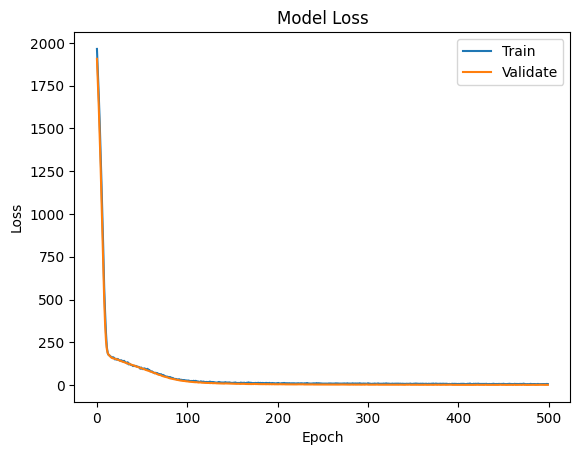

4/4 - 0s - 26ms/step - loss: 0.9616


loss = 0.962

Display the model prediction against the ground truth from test data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


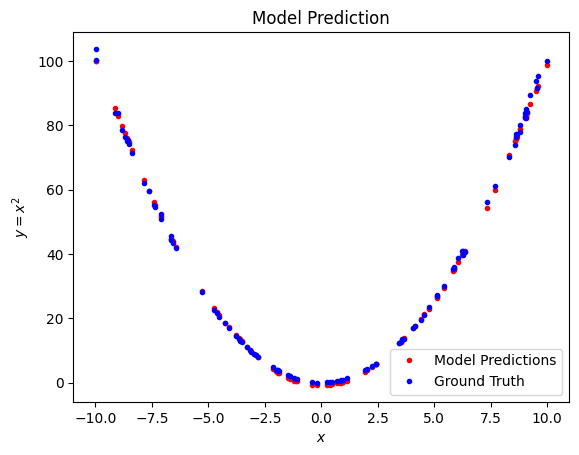


Display the difference between the model prediction and the ground truth from test data



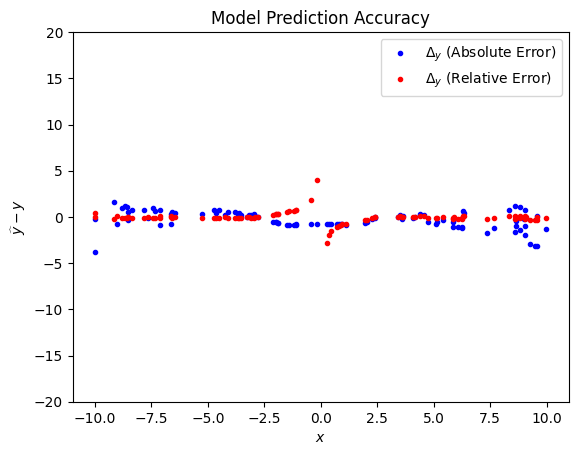

In [6]:
#--------------------------------------------------------------------
# Build the MLP model
#--------------------------------------------------------------------
# Define training configuration
ValidationSplit = 0.5  # Fraction of data used for validation
BatchSize = 100        # Number of samples per training batch
Nepochs = 500          # Number of training epochs
DropoutValue = 0.2     # Fraction of nodes dropped during training

# Define the model structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(1,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),  # First hidden layer
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),                  # Second hidden layer
    tf.keras.layers.Dropout(DropoutValue),                                                       # Dropout layer
    tf.keras.layers.Dense(1)                                                                    # Output layer
])

# Print model configuration details
print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("2 layer MLP with configuration 1:128:128:1")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# Specify the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()  # Mean squared error for regression
learning_rate = 0.001  # Learning rate for the optimizer

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)

# Train the model
history = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)
#--------------------------------------------------------------------
# Visualize the training process
#--------------------------------------------------------------------
print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", 500)

# Plot the loss during training and validation
plt.plot(history.history['loss'], label='loss')  # Training loss
plt.plot(history.history['val_loss'], label='val_loss')  # Validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()
plt.clf()

#--------------------------------------------------------------------
# Evaluate the model on test data
#--------------------------------------------------------------------
loss = model.evaluate(x_test, y_test, verbose=2)  # Evaluate the model
print("loss = {:5.3f}".format(loss))

#--------------------------------------------------------------------
# Plot predictions vs. ground truth
#--------------------------------------------------------------------
print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

# Make predictions on test data
y_predict = model.predict(x_test)

# Plot the predictions and ground truth
plt.plot(x_test, y_predict, "r.", label="Model Predictions")  # Predicted values
plt.plot(x_test, y_test, "b.", label="Ground Truth")  # Actual values
plt.title('Model Prediction')
plt.ylabel('$y=x^{2}$')
plt.xlabel('$x$')
plt.legend(loc='lower right')
plt.show()
plt.clf()

#--------------------------------------------------------------------
# Plot prediction error
#--------------------------------------------------------------------
print("\n\033[1mDisplay the difference between the model prediction and the ground truth from test data\033[0m\n")

delta = []  # Absolute error
deltapc = []  # Relative error

# Calculate errors
for i in range(len(y_predict)):
    thedelta = y_predict[i] - y_test[i]  # Absolute error
    delta.append(thedelta)
    if x_test[i]:
        deltapc.append(thedelta / x_test[i])  # Relative error
    else:
        deltapc.append(0.0)

# Plot the errors
plt.plot(x_test, delta, "b.", label="$\Delta_y$ (Absolute Error)")
plt.plot(x_test, deltapc, "r.", label="$\Delta_y$ (Relative Error)")
plt.legend(loc='upper right')
plt.title('Model Prediction Accuracy')
plt.ylabel('$\widehat{y}-y$')
plt.xlabel('$x$')
plt.ylim(-20, 20)
plt.show()